# Imports

In [5]:
import pandas as pd
import numpy as np
from numpy import dtype
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the Data

In [42]:
kickstarter = pd.read_csv("/data/royzawadzki/kemical/kickstarter-projects/ks-projects-201801.csv", encoding = "latin1", usecols = np.arange(0,13), parse_dates = [5,7])                      

In [43]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0


In [44]:
assert len(kickstarter) == 378661
assert len(kickstarter.columns)== 13
assert list(kickstarter.columns) == ["ID", "name", "category", "main_category", 
                                     "currency", "deadline", "goal", "launched", "pledged", 
                                     "state", "backers", "country", "usd pledged"]
assert dict(kickstarter.dtypes) == {'ID': dtype('int64'),
                                     'backers': dtype('int64'),
                                     'category': dtype('O'),
                                     'country': dtype('O'),
                                     'currency': dtype('O'),
                                     'deadline': dtype('<M8[ns]'),
                                     'goal': dtype('float64'),
                                     'launched': dtype('<M8[ns]'),
                                     'main_category': dtype('O'),
                                     'name': dtype('O'),
                                     'pledged': dtype('float64'),
                                     'state': dtype('O'),
                                     'usd pledged': dtype('float64')}

# Cleaning up the Data Set

In [45]:
kickstarter.isnull().sum()    

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged      3797
dtype: int64

In [46]:
kickstarter[kickstarter["usd pledged"].isnull()][0:10]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN


In [47]:
kickstarter["country"].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

Surprisingly, the data set does not have a lot of missing values which a great thing. However, we do have some missing values for usd pledged. The plan was to possibly use a currency conversion to take the amount pledged (which has no missing values) and fill in the USD pledged based using a simple arithmetic operation. The issue here is that, as seen above, there are also missing values for countries in the form `N,0"` which means that we cannot leverage the country in which the kickstarter was created to convert currencies. All of this considered, I have decided to drop all rows that had a value of `NaN` in the `usd_pledged` column. In reality, this does not have a huge bearing for the success of our models because we are losing 3797 rows from a total of 378661 rows.

In [48]:
kickstarter = kickstarter[kickstarter["usd pledged"].notnull()]
assert not kickstarter["usd pledged"].isnull().values.any()
kickstarter["country"].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG', 'JP'],
      dtype=object)

Interestingly enough, our issue with having a country value that was listed as `N,0"` has also been ameliorated.

In [49]:
kickstarter["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

Since we will want to look at whether the kickstarter was successful or not, for the purposes of training our model, we will have to only include observations in which the outcome was `succesful` or `failed`.

In [50]:
before_filter = kickstarter.shape
kickstarter = kickstarter[(kickstarter["state"] == "successful") | (kickstarter["state"] == "failed")]
assert list(kickstarter["state"].unique()) == ["failed", "successful"]
after_filter = kickstarter.shape
print("Shape before: {0}; Shape After: {1}".format(before_filter, after_filter))

Shape before: (374864, 13); Shape After: (331465, 13)


Only around 40,000 rows were lost due to not falling under the state of success or failure. This bodes well for our analysis because we aren't losing too much information about the other columns due to the state the kickstarter was in when data collection occured.

### Dealing with Outliers

In [51]:
kickstarter.describe().drop(["ID", "pledged"], axis = 1)

,goal,backers,usd pledged
count,3.314650e+05,331465.000000,3.314650e+05
mean,4.426614e+04,116.455315,7.684569e+03
std,1.118264e+06,965.728598,8.320938e+04
min,1.000000e-02,0.000000,0.000000e+00
25%,2.000000e+03,2.000000,2.500000e+01
50%,5.000000e+03,15.000000,5.020000e+02
75%,1.500000e+04,63.000000,3.421000e+03
max,1.000000e+08,219382.000000,2.033899e+07


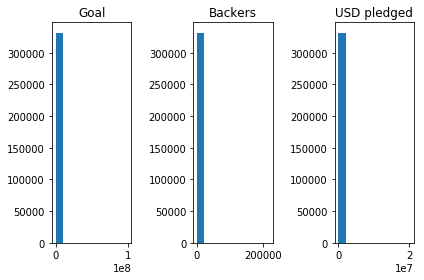

In [52]:
plt.subplot(1,3,1)
plt.hist("goal", data = kickstarter)
plt.title("Goal")
plt.subplot(1,3,2)
plt.hist("backers", data = kickstarter)
plt.title("Backers")
plt.subplot(1,3,3)
plt.hist("usd pledged", data = kickstarter)
plt.title("USD pledged")
plt.tight_layout()

As demonstrated by the statistics and the histograms, we have some massive outliers in `goal`, `usd pledged`, and `backers` that are inflating the standard deviation and skewing the mean to the right of the distribution. This is a big problem in both feeding our data to our model and analyzing the data. To mitigate the issue a log transformation for all three of these columns would be appropriate, given how skewed to the right the distribution is. We will have to filter out observations in `backers` and `usd pledged` that are zero or else negitive infinity will show up for values that were zero before transforming. Without doing this step we wouldn't be able to visualize or see certain statistics of the distribution such as the mean.

In [53]:
kickstarter = kickstarter[(kickstarter["usd pledged"] > 0) & (kickstarter["backers"] > 0)]

kickstarter["goal_log"] = kickstarter["goal"].apply(np.log)
kickstarter["backers_log"] = kickstarter["backers"].apply(np.log)
kickstarter["usd pledged_log"] = kickstarter["usd pledged"].apply(np.log)
assert len(kickstarter[(kickstarter["usd pledged_log"] == np.inf) 
                       & (kickstarter["backers"] == np.inf)]) == 0

In [55]:
kickstarter.describe()[["goal_log", "backers_log", "usd pledged_log"]]

,goal_log,backers_log,usd pledged_log
count,277905.000000,277905.000000,277905.000000
mean,8.574509,3.080740,6.583117
std,1.648113,1.848811,2.556202
min,-4.605170,0.000000,-0.755023
25%,7.600902,1.609438,4.874510
50%,8.517193,3.178054,6.908755
75%,9.615805,4.369448,8.446365
max,18.420681,12.298570,16.828050


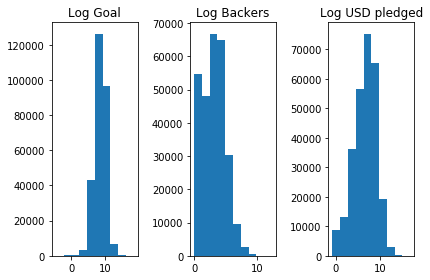

In [56]:
plt.subplot(1,3,1)
plt.hist("goal_log", data = kickstarter)
plt.title("Log Goal")
plt.subplot(1,3,2)
plt.hist("backers_log", data = kickstarter)
plt.title("Log Backers")
plt.subplot(1,3,3)
plt.hist("usd pledged_log", data = kickstarter)
plt.title("Log USD pledged")
plt.tight_layout()

After our log transformation using the numpy default, the natural log, oour distributions and statistics look much better. Furthermore, we only lost 60,000 observations and information in our model regarding when backers and money raised is 0, which is not too bad of a trade off for not skewed distributions. That being said, we are losing infomration about kickstarters that finish with no backers and no money raised.

# Creation of New Columns

Next, we want to get the column `launched` and `deadline` to the same format so we can compute a new column `length` which measures how long the kickstarter lasted for in days.

In [57]:
kickstarter["duration"] = (kickstarter["deadline"] - kickstarter["launched"])
kickstarter["duration"] = kickstarter["duration"].apply(lambda x: x.days)
assert kickstarter.duration.dtype == np.int64

We want to investigate if certain predictors such as backers vary by season or month the kickstarter was launched in. Two new columns `month` and `season` will be created.

In [67]:
def season(x):
    season_dict = {1: "Winter", 2: "Winter", 3: "Spring", 4: "Spring", 5: "Spring", 
                   6: "Summer", 7: "Summer", 8: "Summer", 9: "Fall", 10: "Fall",
                   11: "Fall", 12: "Winter"}
    return season_dict[x.month]

def month_name(x):
    month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 
                   6: "June", 7: "July", 8: "August", 9: "September", 10: "October",
                   11: "November", 12: "December"}
    return month_dict[x.month]

kickstarter["season"] = kickstarter["launched"].apply(season)
kickstarter["month"] = kickstarter["launched"].apply(month_name)

assert list(kickstarter["season"].unique()) == ["Fall", "Winter", "Spring", "Summer"]
assert list(kickstarter["month"].unique()) == ['September', 'January', 'March', 'February', 
                                               'December', 'April','October', 'August', 'May', 
                                               'November', 'July', 'June']

We will also have to create a column that encodes the number as an integer for the purposes of modeling and visualization

In [69]:
def month_number(x):
    return x.month

def season_number(x):
    season_to_number = {"Winter": 1, "Spring": 2, "Summer": 3, "Fall": 4}
    return season_to_number[x]

kickstarter["month_number"] = kickstarter["launched"].apply(month_number).astype(np.object)
kickstarter["season_number"] = kickstarter["season"].apply(season_number).astype(np.object)

assert sorted(list(kickstarter["month_number"].unique())) == [i for i in range(1,13)]
assert sorted(list(kickstarter["season_number"].unique())) == [i for i in range(1,5)]

We have categorical features that we would like to use in constructing our model. Becuase we cannot pass in strings to the model, we must create dummy variables.

# Exporting Our Cleaning and Transformed Data Set

In [73]:
kickstarter.to_csv("/data/royzawadzki/kickstarter.csv")